In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv("train.csv")
data2=pd.read_csv("test.csv")

In [3]:
data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
data1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
data1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Statistical Analysis

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

In [17]:
#categorical features
def cat_plot(col):
    plt.figure(figsize=(5,3))
    sns.countplot(data1[col],color="green")
    plt.show()

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


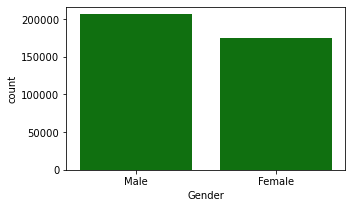

In [18]:
cat_plot('Gender')

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


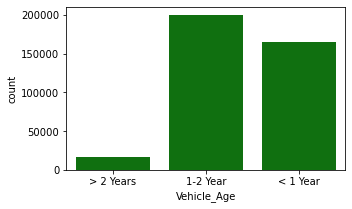

In [19]:
cat_plot('Vehicle_Age')

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


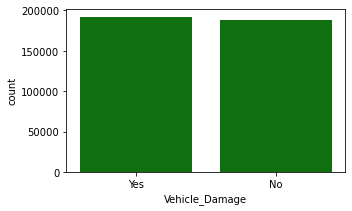

In [20]:
cat_plot('Vehicle_Damage')

In [21]:
def num_plot():
    for col in data1.select_dtypes(include=np.number):
        print('Min:',data1[col].min())
        print('Max:',data1[col].max())
        print('Mean:',data1[col].mean())
        plt.figure(figsize=(5,3))
        sns.distplot(data1[col],color="yellow")
        plt.show()

Min: 1
Max: 381109
Mean: 190555.0


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


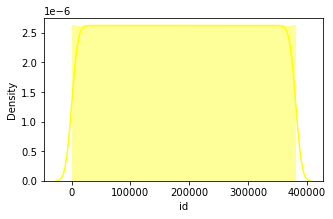

Min: 20
Max: 85
Mean: 38.822583565331705


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


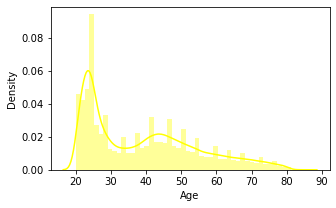

Min: 0
Max: 1
Mean: 0.9978693759528114


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


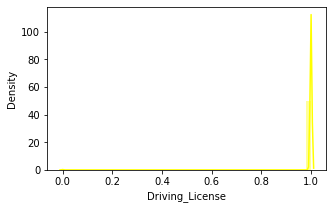

Min: 0.0
Max: 52.0
Mean: 26.388807401557035


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


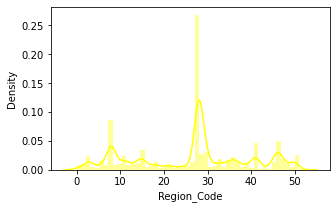

Min: 0
Max: 1
Mean: 0.4582101183650871


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


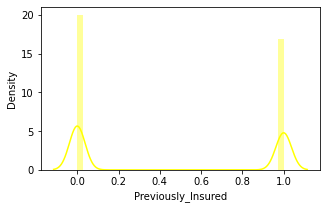

Min: 2630.0
Max: 540165.0
Mean: 30564.389581458323


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


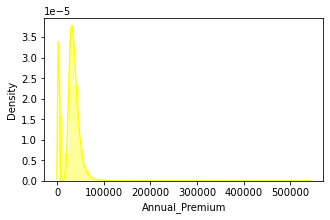

Min: 1.0
Max: 163.0
Mean: 112.03429465061177


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


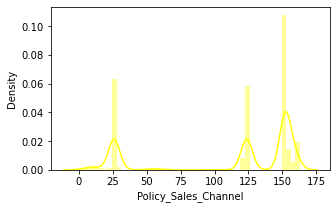

Min: 10
Max: 299
Mean: 154.34739667654136


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


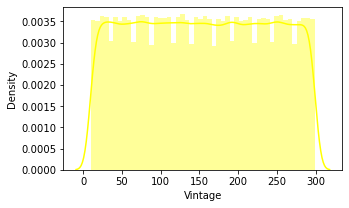

Min: 0
Max: 1
Mean: 0.12256336113815208


C:\Users\chint\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


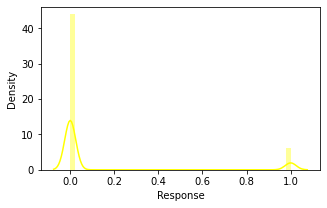

In [22]:
num_plot()

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


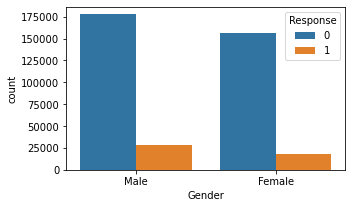

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


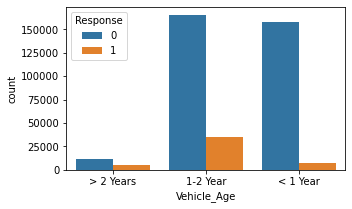

C:\Users\chint\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


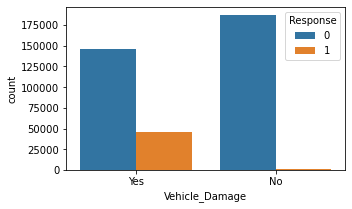

In [23]:
cols=['Gender','Vehicle_Age','Vehicle_Damage']
for i in cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data1[i],hue=data1['Response'])
    plt.show()
    print()

<AxesSubplot:>

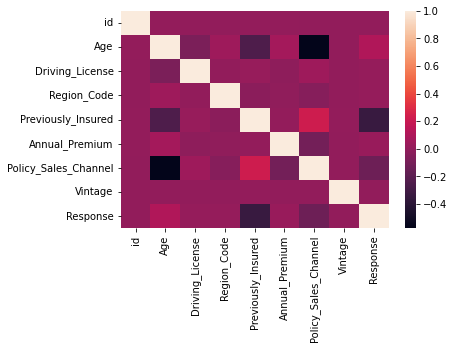

In [24]:
corr=data1.corr()
sns.heatmap(corr)

In [25]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
cat_data1=data1.select_dtypes(exclude=np.number)

In [26]:
lb=LabelEncoder()

In [27]:
for i in cat_data1.columns:
    data1[i]=lb.fit_transform(np.array(data1[i]))

In [28]:
data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [29]:
data2['Response']=data2['Vehicle_Damage']

In [30]:
data2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,No
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,Yes
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,Yes
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,Yes
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,No


In [31]:
cat_data2=data2.select_dtypes(exclude=np.number)

In [32]:
for i in cat_data2.columns:
    data2[i]=lb.fit_transform(np.array(data2[i]))

In [33]:
data2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53,0
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111,1
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199,1
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187,1
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297,0


# ModelSelection

In [35]:
x=data2.drop(['id','Response'],axis=1)
y=data2['Response']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(101629, 10)
(25408, 10)
(101629,)
(25408, 10)


# Test Modelling

In [38]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\chint\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred=lr.predict(x_test)

In [40]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))

0.650779282115869
              precision    recall  f1-score   support

           0       0.64      0.70      0.67     12686
           1       0.67      0.61      0.63     12722

    accuracy                           0.65     25408
   macro avg       0.65      0.65      0.65     25408
weighted avg       0.65      0.65      0.65     25408



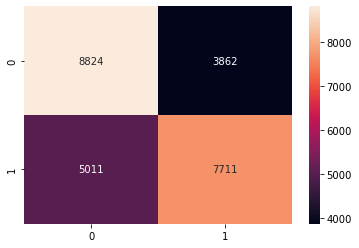

In [41]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
dect=DecisionTreeClassifier()

In [43]:
dect.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=dect.predict(x_test)

In [45]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12686
           1       1.00      1.00      1.00     12722

    accuracy                           1.00     25408
   macro avg       1.00      1.00      1.00     25408
weighted avg       1.00      1.00      1.00     25408

